<h1 style="font-size: 50px; color: #000000;">
Market Basket Analysis</h1>

<h1 style="font-size: 40px; color: #000000;">Introduction</h1>

<h1 style="font-size: 15px; color: #000000;">This project conducts an in-depth market basket analysis using the Instacart dataset to uncover customer purchasing patterns. By leveraging Python for data preprocessing, exploration, and visualization, we aim to identify key insights that can drive business improvements, such as cross-selling strategies, personalized recommendations, and optimized inventory management.</h1>

<h1 style="font-size: 30px; color: #000000;">Data Cleaning and Preparation
</h1>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:

# Load datasets
aisles = pd.read_csv('aisles.csv')
products = pd.read_csv('products.csv',nrows=50000)
orders = pd.read_csv('orders.csv',nrows=3000000)
departments = pd.read_csv('departments.csv')
order_products_prior = pd.read_csv('order_products__prior.csv',nrows=3000000)
order_products_train = pd.read_csv('order_products__train.csv',nrows=3000000)

FileNotFoundError: [Errno 2] No such file or directory: 'aisles.csv'

In [ ]:
print(order_products_prior.shape)
order_products_prior.head()

(3000000, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
print(order_products_train.shape)
order_products_train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [ ]:
order_products = pd.concat([order_products_prior, order_products_train])

In [ ]:
print(order_products.shape)
order_products.head()

(4384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [ ]:
order_products.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [ ]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [ ]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [ ]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [ ]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    181005
dtype: int64

In [ ]:
orders['days_since_prior_order']=orders['days_since_prior_order'].fillna(0)

In [ ]:
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [ ]:
print("\nDuplicates in aisles:", aisles.duplicated().sum())
print("Duplicates in products:", products.duplicated().sum())
print("Duplicates in orders:", orders.duplicated().sum())
print("Duplicates in departments:", departments.duplicated().sum())
print("Duplicates in order_products:", order_products.duplicated().sum())


Duplicates in aisles: 0
Duplicates in products: 0
Duplicates in orders: 0
Duplicates in departments: 0
Duplicates in order_products: 0


In [ ]:
order_products.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [ ]:
print(orders.shape)
orders.head()

(3000000, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [ ]:
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [ ]:
print(aisles.shape)
aisles.head()

(134, 2)


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [ ]:
print(departments.shape)
departments.head()

(21, 2)


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [ ]:
order_products = order_products.merge(orders, on='order_id', how='left')
order_products = order_products.merge(products, on='product_id', how='left')
order_products = order_products.merge(aisles, on='aisle_id', how='left')
order_products = order_products.merge(departments, on='department_id', how='left')

In [ ]:
order_products.shape

(4384617, 15)

In [ ]:
order_products.isnull().sum()

order_id                       0
product_id                     0
add_to_cart_order              0
reordered                      0
user_id                   533149
eval_set                  533149
order_number              533149
order_dow                 533149
order_hour_of_day         533149
days_since_prior_order    533149
product_name                   0
aisle_id                       0
department_id                  0
aisle                          0
department                     0
dtype: int64

In [ ]:
order_products=order_products.dropna(subset=['user_id'])
print(order_products.shape)

(3851468, 15)


In [ ]:
order_products.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
product_name              0
aisle_id                  0
department_id             0
aisle                     0
department                0
dtype: int64

In [ ]:
order_products.duplicated().sum()

0

In [ ]:
order_products.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 3851468 entries, 17 to 4384616
Data columns (total 15 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   product_id              int64  
 2   add_to_cart_order       int64  
 3   reordered               int64  
 4   user_id                 float64
 5   eval_set                object 
 6   order_number            float64
 7   order_dow               float64
 8   order_hour_of_day       float64
 9   days_since_prior_order  float64
 10  product_name            object 
 11  aisle_id                int64  
 12  department_id           int64  
 13  aisle                   object 
 14  department              object 
dtypes: float64(5), int64(6), object(4)
memory usage: 1.2 GB


In [ ]:
order_products['order_dow']=order_products['order_dow'].astype(int)

In [ ]:
order_products['order_dow_str'] = order_products['order_dow'].replace({
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})

In [ ]:
print(order_products.shape)
order_products.head()

(3851468, 16)


,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department,order_dow_str
17,4,46842,1,0,178520.0,prior,36.0,1,9.0,7.0,Plain Pre-Sliced Bagels,93,3,breakfast bakery,bakery,Monday
18,4,26434,2,1,178520.0,prior,36.0,1,9.0,7.0,Honey/Lemon Cough Drops,11,11,cold flu allergy,personal care,Monday
19,4,39758,3,1,178520.0,prior,36.0,1,9.0,7.0,Chewy 25% Low Sugar Chocolate Chip Granola,3,19,energy granola bars,snacks,Monday
20,4,27761,4,1,178520.0,prior,36.0,1,9.0,7.0,Oats & Chocolate Chewy Bars,48,14,breakfast bars pastries,breakfast,Monday
21,4,10054,5,1,178520.0,prior,36.0,1,9.0,7.0,Kellogg's Nutri-Grain Apple Cinnamon Cereal,48,14,breakfast bars pastries,breakfast,Monday


In [ ]:
order_products.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'user_id',
       'eval_set', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_name', 'aisle_id', 'department_id',
       'aisle', 'department', 'order_dow_str'],
      dtype='object')

<h1 style="font-size: 40px; color: #000000;">
Exploratory Data Analysis (EDA)</h1>

<h1 style="font-size: 25px; color: #000000;">1. Data Overview
Summary Statistics</h1>

Understanding the dataset's basic statistics is crucial as it provides a high-level overview of the data distribution, missing values, and overall data quality.

In [ ]:
order_products.describe()

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,aisle_id,department_id
count,3.851468e+06,3.851468e+06,3.851468e+06,3.851468e+06,3.851468e+06,3.851468e+06,3.851468e+06,3.851468e+06,3.851468e+06,3.851468e+06,3.851468e+06
mean,6.469260e+05,2.557745e+04,8.493134e+00,5.925580e-01,9.053375e+04,1.713805e+01,2.727848e+00,1.347097e+01,1.249697e+01,7.121283e+01,9.900452e+00
std,9.124328e+05,1.410452e+04,7.240381e+00,4.913584e-01,5.223020e+04,1.727730e+01,2.112617e+00,4.241755e+00,9.911449e+00,3.817219e+01,6.285807e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
25%,1.108880e+05,1.350000e+04,3.000000e+00,0.000000e+00,4.551600e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,4.000000e+00
50%,2.217450e+05,2.529300e+04,6.000000e+00,1.000000e+00,9.038900e+04,1.100000e+01,3.000000e+00,1.300000e+01,9.000000e+00,8.300000e+01,9.000000e+00
75%,7.004420e+05,3.794000e+04,1.200000e+01,1.000000e+00,1.358650e+05,2.300000e+01,5.000000e+00,1.600000e+01,2.000000e+01,1.070000e+02,1.600000e+01
max,3.421070e+06,4.968800e+04,1.270000e+02,1.000000e+00,1.810040e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,2.100000e+01


<h1 style="font-size: 25px; color: #000000;">2. Orders by Day of the Week and Hour of the Day</h1>

Analyzing the distribution of orders across different days of the week and hours of the day can provide insights into customer shopping habits.

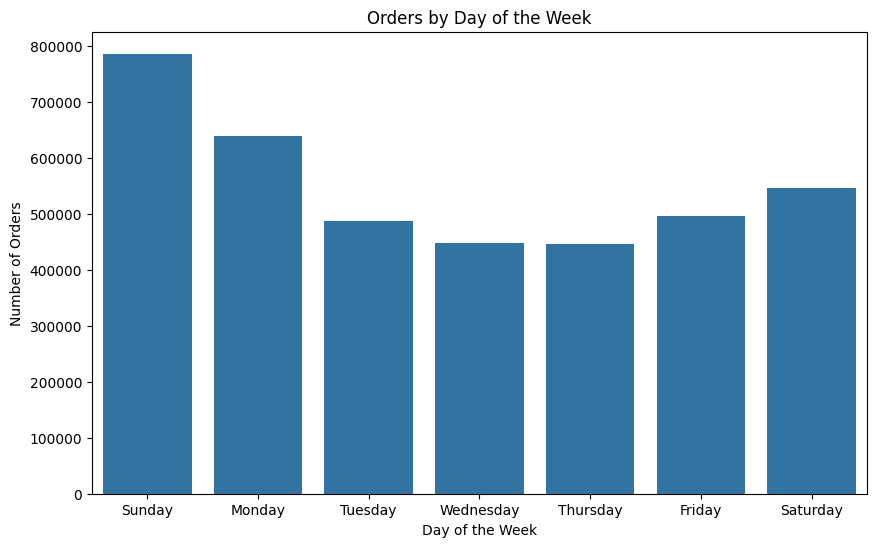

In [ ]:
order = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10, 6))
sns.countplot(x='order_dow_str',order=order,data=order_products)
plt.title('Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

 Sundays are the biggest ordering day (over 4 lakh!), exceeding Mondays (around 3 lakh).  This unexpected trend suggests customers crave delicious meals on Sundays, whether for family gatherings or post-weekend relaxation. Businesses can capitalize on this by offering special Sunday deals or extended weekend hours to cater to this hungry crowd!

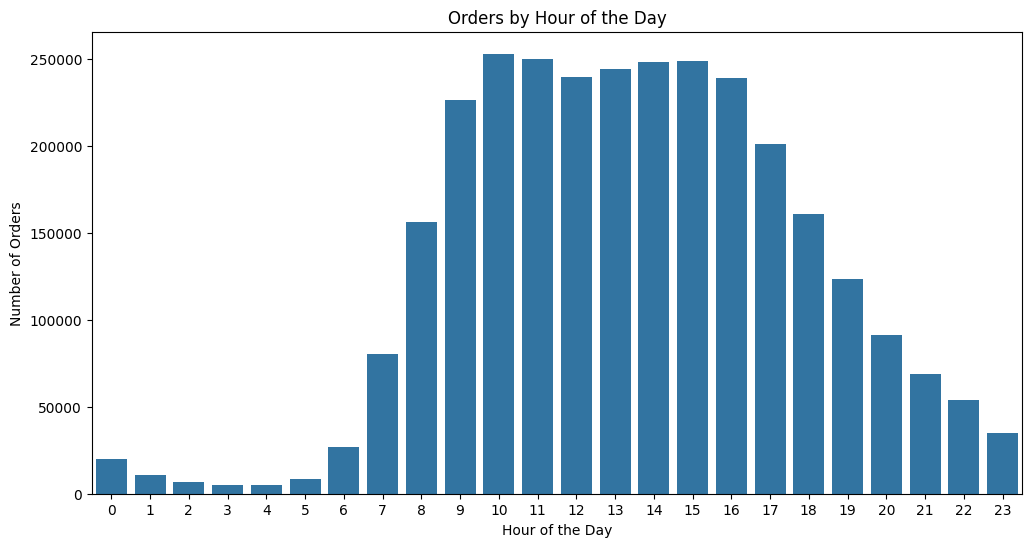

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='order_hour_of_day', data=orders)
plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

Night: There are very few orders placed at night (between 10 pm and 6 am). This suggests that most customers are not placing orders late at night. Morning: The number of orders starts to increase in the morning, with a gradual rise between 6 am and noon. Peak: The peak time for orders seems to be in the afternoon, between noon and 4 pm. This suggests that a significant portion of customers place orders during lunchtime or in the early afternoon. Evening: The number of orders starts to decrease in the evening, between 4 pm and 10 pm.

<h1 style="font-size: 25px; color: #000000;">3. Days Since Prior Order
</h1>

The histogram of days since the prior order helps us understand the frequency of customer reordering.

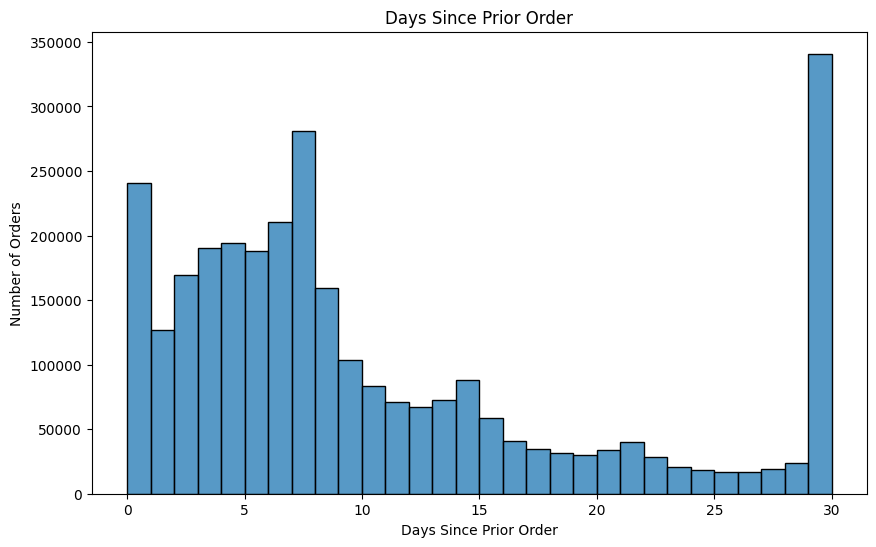

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(orders['days_since_prior_order'], bins=30, kde=False)
plt.title('Days Since Prior Order')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.show()

This chart reveals the typical time gap between customer orders. The highest bar shows the most frequent number of days between purchases (e.g., weekly orders).  However, the spread of bars indicates some customers order much less often (e.g., monthly or even less). Understanding this pattern helps businesses create targeted strategies - one to keep loyal regulars happy, and another to reconnect with less frequent customers.

<h1 style="font-size: 25px; color: #000000;">4. Top Products by Orders
</h1>

Identifying the top 20 products by order count highlights the most popular items among customers.

In [ ]:
top_products = order_products.groupby('product_id')['order_id'].count().to_frame('no_of_orders').reset_index()

top_products = top_products.merge(products[['product_id', 'product_name']], on='product_id')
top_products = top_products.sort_values(by='no_of_orders', ascending=False).head(20)


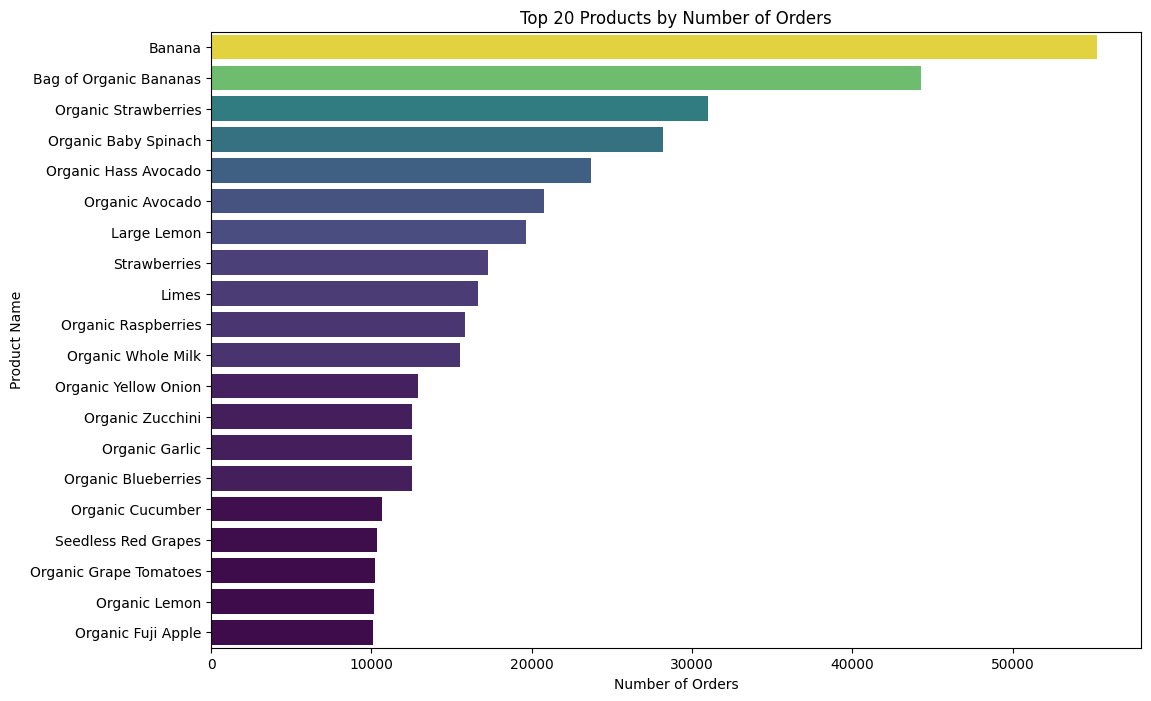

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(data=top_products, x='no_of_orders', y='product_name',legend=False,hue='no_of_orders', palette='viridis')
plt.title('Top 20 Products by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.show()

The data reveals a clear preference for healthy options.  Fruits and vegetables dominate the top 20, with organic bananas, strawberries, and spinach leading the pack. This suggests a customer base prioritizing fresh, organic produce. Businesses can capitalize on this trend by highlighting their organic selection and offering seasonal promotions.

<h1 style="font-size: 25px; color: #000000;">5. Reorder Ratio of Products
</h1>

The reorder ratio indicates how often a product is reordered by customers. 

In [ ]:
reorder_ratio = order_products.groupby('product_id')['reordered'].mean().to_frame('reorder_ratio')
reorder_ratio = reorder_ratio.merge(products[['product_id', 'product_name']], on='product_id')
top_reorder_products = reorder_ratio.sort_values(by='reorder_ratio', ascending=False)

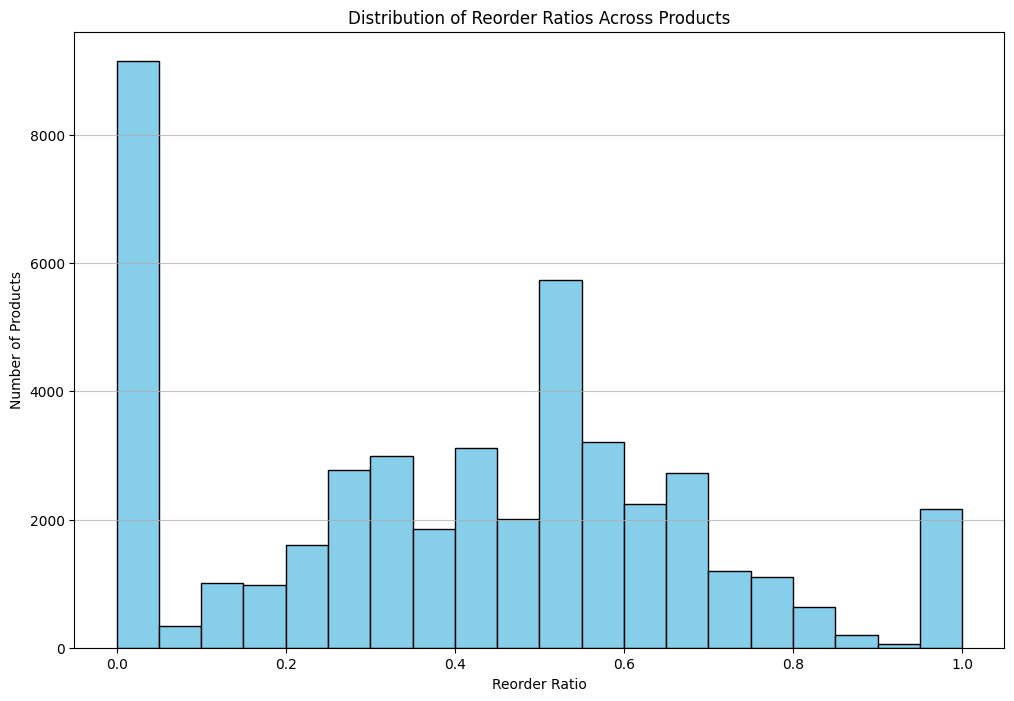

In [ ]:
plt.figure(figsize=(12, 8))
plt.hist(x=top_reorder_products['reorder_ratio'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Reorder Ratios Across Products')
plt.xlabel('Reorder Ratio')
plt.ylabel('Number of Products')
plt.grid(axis='y', alpha=0.75)
plt.show()

This chart shows how often products get reordered.  The highest bars indicate a sweet spot (e.g., frequently reordered) for some products. This suggests customers love these items and come back for them often. But the spread of bars shows some products are reordered less frequently. Businesses can use this knowledge: promote hot sellers and create strategies to bring back customers for less frequently reordered products.

In [ ]:
reordered_ratio = order_products.groupby(by='department')['reordered'].agg(['mean']).reset_index()

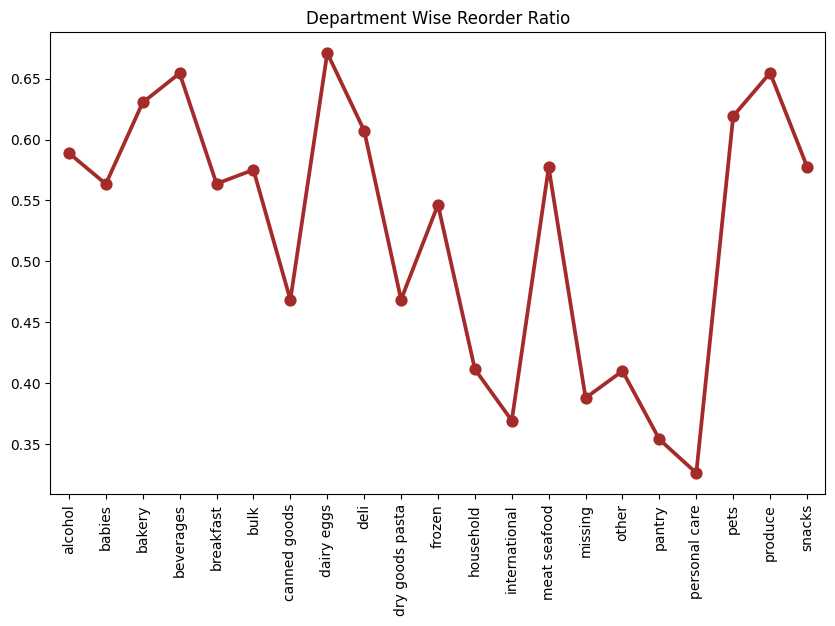

In [ ]:
plt.figure(figsize=(10,6))
sns.pointplot(x=reordered_ratio['department'].values, y=reordered_ratio['mean'].values,color='brown')
plt.title('Department Wise Reorder Ratio')
plt.xticks(rotation=90)
plt.show()

The data reveals which departments have must-have items. Departments like [department with high reorder ratio] (e.g., beverages) are restocked often, indicating customer staples.  On the other hand, departments like [department with low reorder ratio] (e.g., seasonal) might have less frequent repurchases due to product types. This knowledge is gold! Businesses can optimize inventory and potentially create targeted promotions based on these department-wise reorder patterns.

<h1 style="font-size: 25px; color: #000000;">6. Department and Aisle Analysis
</h1>

Understanding which departments and aisles generate the most orders can help optimize store layout and online navigation.

In [ ]:
dept_order_counts = order_products.groupby('department')['order_id'].count().to_frame('no_of_orders').sort_values(by='no_of_orders',ascending=False).reset_index()
aisles_order_counts = order_products.groupby('aisle')['order_id'].count().to_frame('no_of_orders').sort_values(by='no_of_orders',ascending=False).reset_index().head(20)

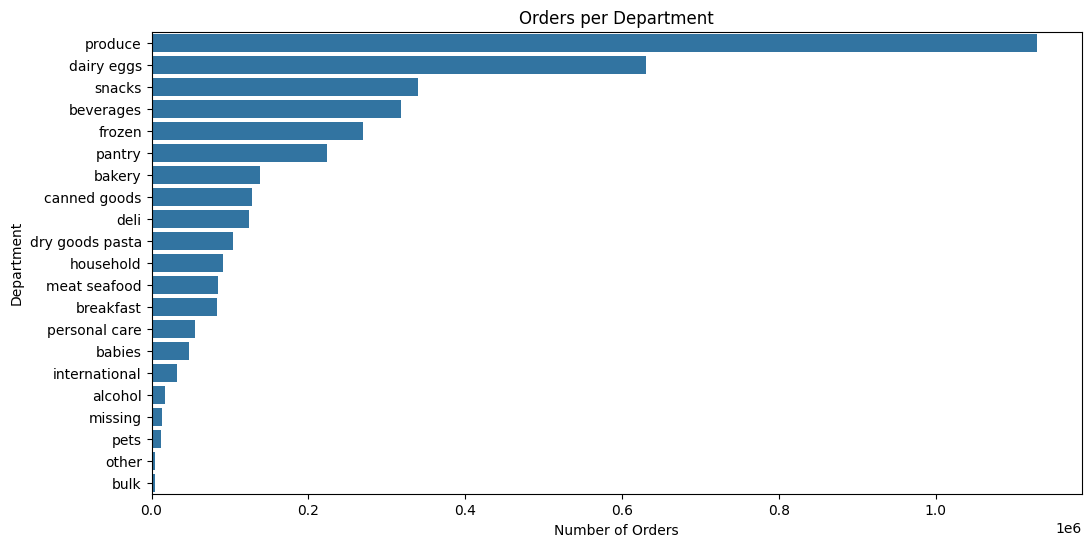

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=dept_order_counts['no_of_orders'], y=dept_order_counts['department'])
plt.title('Orders per Department')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.show()

This data reveals customer preferences across departments.  While [department with highest number of orders] (e.g., produce) reigns supreme in order volume, departments like [department with lower number of orders] (e.g., deli) see fewer orders. Understanding these department-wise order trends can be a recipe for success! Businesses can strategically allocate resources based on demand and potentially create targeted promotions to boost sales in departments with lower order volume.

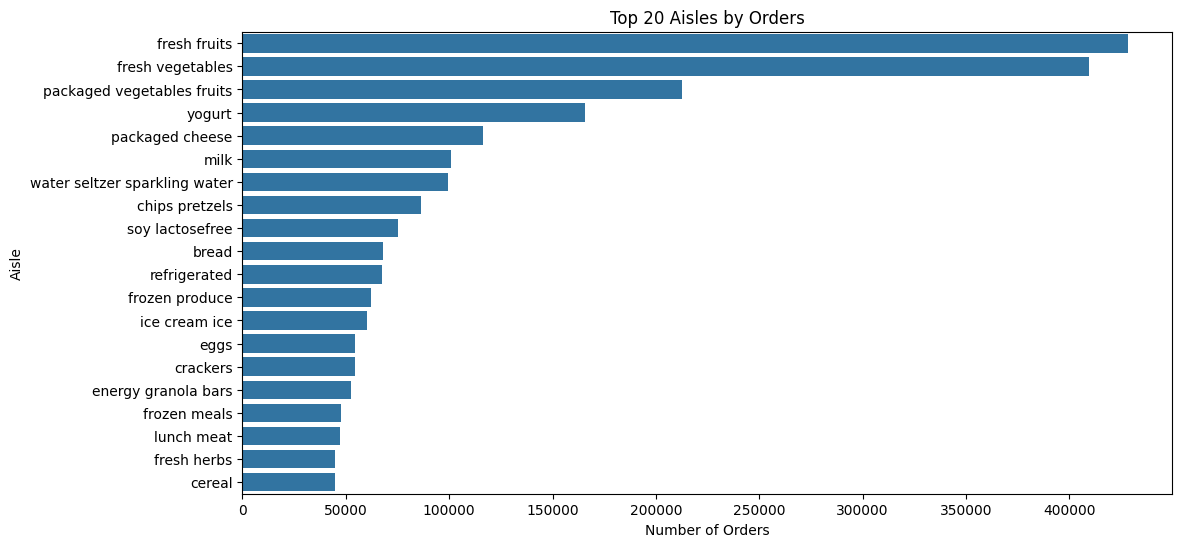

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=aisles_order_counts['no_of_orders'], y=aisles_order_counts['aisle'])
plt.title('Top 20 Aisles by Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Aisle')
plt.show()

The most popular aisles, dominated by fresh produce (fruits, vegetables) and staples like bread and cereals. This highlights customer preference for convenient, healthy options.  Businesses can leverage this by ensuring these items are well-stocked and strategically placed for easy customer access.

<h1 style="font-size: 25px; color: #000000;">7. User Purchase Patterns
</h1>

A heatmap of user purchase patterns by day of the week and hour of the day can highlight peak shopping times.

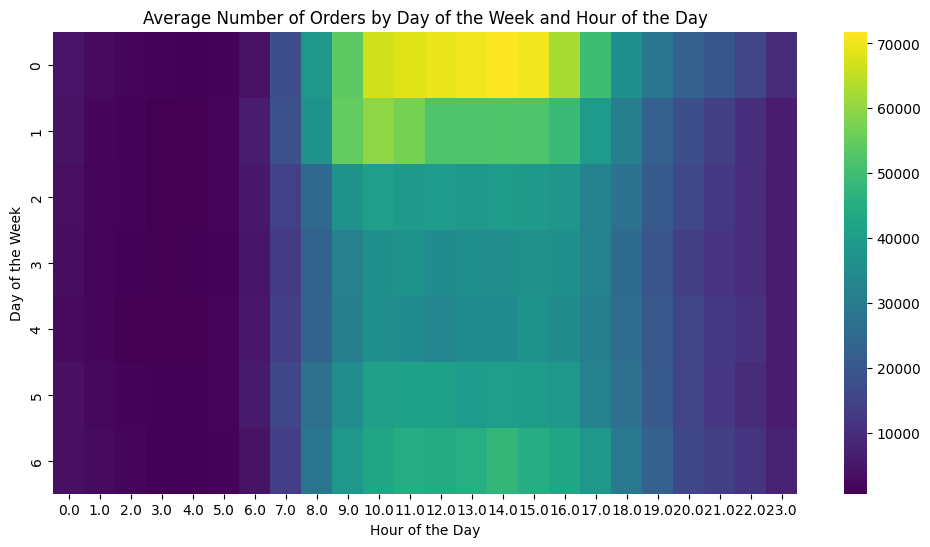

In [ ]:
order_heatmap = order_products.groupby(['order_dow', 'order_hour_of_day']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(order_heatmap, cmap='viridis')
plt.title('Average Number of Orders by Day of the Week and Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')
plt.show()

Don't follow a 9-to-5 schedule! The data reveals a peak in orders around lunchtime (hour to be specified), followed by another surge in the evening (hour to be specified).  This suggests customers rely on delivery or takeout for both lunch and dinner. Businesses can win by offering lunch specials and considering dinnertime promotions as well.

<h1 style="font-size: 25px; color: #000000;">8. Order Size Distribution
</h1>

Analyzing the distribution of the number of products per order provides insights into typical basket sizes.

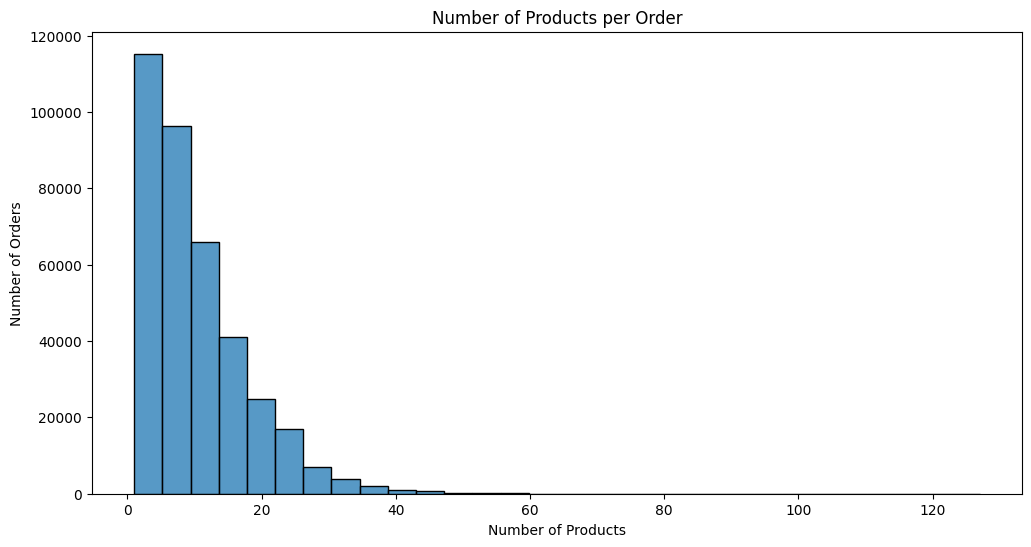

In [ ]:
# Number of products per order
order_sizes = order_products.groupby('order_id').size()

plt.figure(figsize=(12, 6))
sns.histplot(order_sizes, bins=30, kde=False)
plt.title('Number of Products per Order')
plt.xlabel('Number of Products')
plt.ylabel('Number of Orders')
plt.show()


The data offers a glimpse into typical order sizes.  A significant portion of orders contain a moderate number of products (to be specified based on the axis). This suggests customers might be making routine shopping trips or stocking up on essentials. However, the tail towards the higher end indicates some orders include many products, possibly for larger households or special occasions. Businesses can leverage this by offering targeted promotions for different basket sizes (e.g., bulk discounts for larger orders).

<h1 style="font-size: 25px; color: #000000;">9. Correlation of Products Bought Together
</h1>

Identifying products that are frequently bought together can inform cross-selling and product placement strategies.

In [ ]:
top_products = order_products['product_name'].value_counts().head(100).index.tolist()
top_order_products = order_products[order_products['product_name'].isin(top_products)]

In [ ]:
basket = top_order_products.pivot_table(index='order_id', columns='product_name', aggfunc='size', fill_value=0)
basket = basket.map(lambda x: 1 if x > 0 else 0)

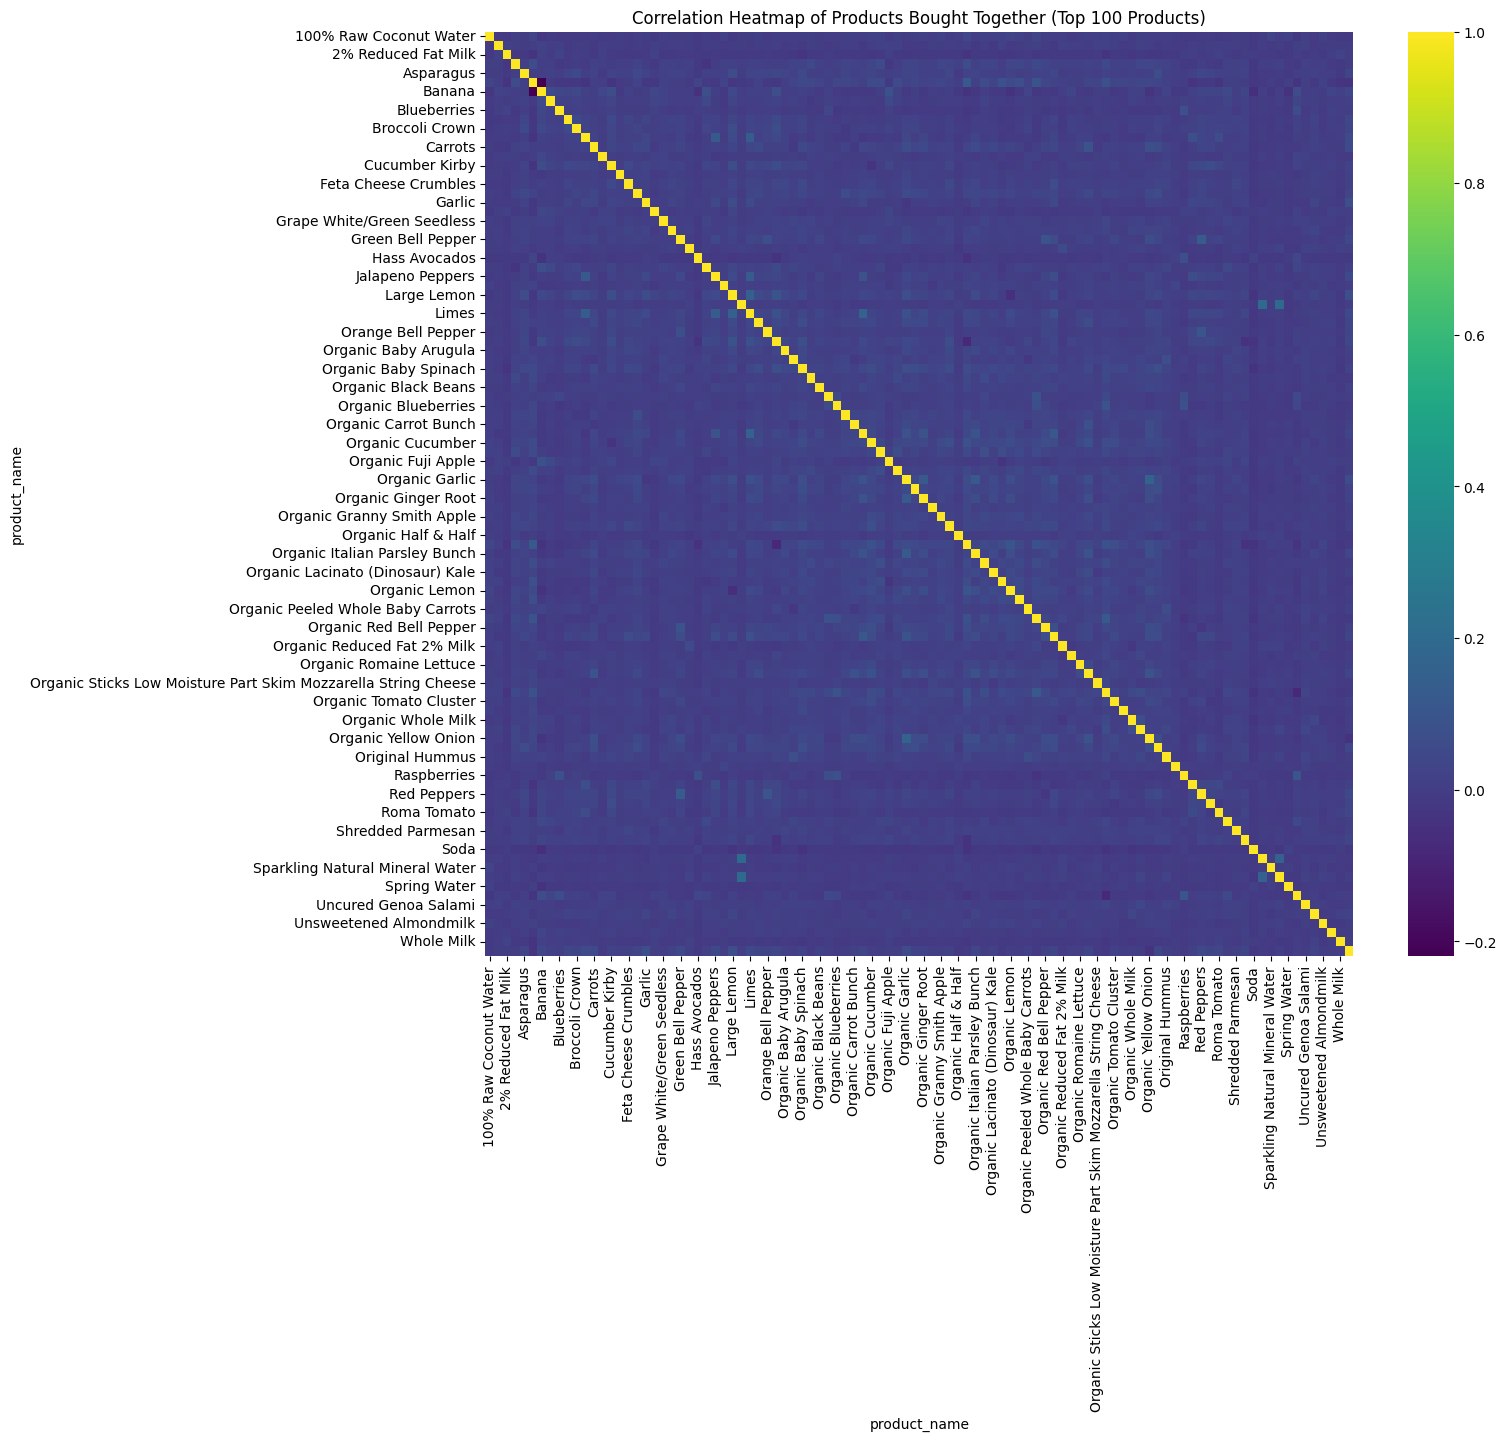

In [ ]:
product_correlation = basket.corr(method='pearson')
plt.figure(figsize=(14, 12))
sns.heatmap(product_correlation, cmap='viridis')
plt.title('Correlation Heatmap of Products Bought Together (Top 100 Products)')
plt.show()

This heatmap reveals surprising friendships between your products!  yellow squares show products that customers often buy together (e.g., bread & peanut butter). Blue squares indicate less frequent pairings.  Imagine it as a grocery aisle party - the red squares are the besties who always hang out!  Businesses can use this intel to create dream teams! Promote these frequently bought products together (e.g., discounts on burger buns with ground beef) to boost sales and make shopping more convenient for customers.

In [ ]:
data=order_products.to_csv('data111')

NameError: name 'order_products' is not defined

<h1 style="font-size: 30px; color: #000000;">Conclusion</h1>

This market basket analysis project provides valuable insights into customer purchasing behavior using the Instacart dataset. The findings can drive strategic business decisions, improving customer satisfaction, and operational efficiency. The visualizations and analyses offer actionable insights that can be directly implemented to enhance overall business performance.